# Capstone Project 1 MSRP Prediction
## Darren Lyles

### In this notebook, I will be applying and testing various supervised learning methods to predict the MSRP of a car manufactured for the year 2017 given its numerical features.  The features that I will be using for prediction are: engine HP, highway MPG, and city MPG.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns
import warnings
import sklearn.model_selection
import sklearn.linear_model
import statsmodels.api as sm

<p>To make referencing to the columns more accessible (in the case of applying the OLS function and applying dot notation), I will remove all spacings in the data set's columns and replace them with underscores as shown below.</p>

In [2]:
cars_df = pd.read_csv('Car_Features_and_MSRP/data2017_cleaned.csv')
cars_df.columns = cars_df.columns.str.replace(' ', '_').str.lower()
cars_df.head()

,unnamed:_0,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,0,FIAT,124 Spider,2017,premium unleaded (recommended),160.0,4.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,35,26,819,27495
1,1,FIAT,124 Spider,2017,premium unleaded (recommended),160.0,4.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,35,26,819,24995
2,2,FIAT,124 Spider,2017,premium unleaded (recommended),160.0,4.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,35,26,819,28195
3,3,BMW,2 Series,2017,premium unleaded (recommended),335.0,6.0,AUTOMATIC,all wheel drive,2.0,Compact,Coupe,31,21,3916,46450
4,4,BMW,2 Series,2017,premium unleaded (recommended),335.0,6.0,AUTOMATIC,rear wheel drive,2.0,Compact,Convertible,32,21,3916,49050


<p>In the following two blocks below, we visualize linear regression for single varaibles. In this case they are highway_mpg and city_mpg. These visualizations should give us an intuitive understanding of linear regression before we apply it to both variables simultaneously. Note that our training size for the single variable regression models are 20% of the data set. We also look at the score for each model by evaluating its $R^2$ values for 5-fold cross validation and the mean of those values. Additionally, we quantify the estimated slope and intercept values, or formally $\hat{\beta_0}$ and $\hat{\beta_1}$.</p>

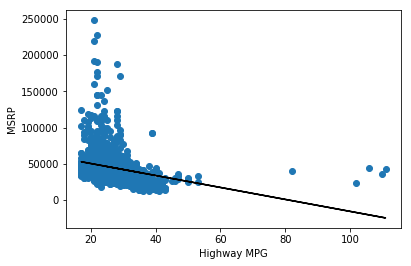

The scores for 5-fold cross validation are [0.14140707 0.114189   0.04428103 0.11657213 0.10686383]
The average cross validation score is 0.10466261158867148
The intercept of the regression line is [66861.19964952]
The coefficients are [[-823.67045516]]
The root mean squared error of the target is 22644.14729004269


In [3]:
X = cars_df.highway_mpg.values
X = X.reshape(len(X), 1)
y = cars_df.msrp.values
y = y.reshape(len(y), 1)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.8, random_state=0) 

lr = sklearn.linear_model.LinearRegression()
lr.fit(X_train, y_train)
plt.scatter(X_test, y_test)
plt.xlabel('Highway MPG')
plt.ylabel('MSRP')
plt.plot(X_test, lr.predict(X_test), color='black')
plt.show()
scores = sklearn.model_selection.cross_val_score(lr, X_test, y_test, cv=5)
print('The scores for 5-fold cross validation are {}'.format(scores))
print('The average cross validation score is {}'.format(scores.mean()))
print('The intercept of the regression line is {}'.format(lr.intercept_))
print('The coefficients are {}'.format(lr.coef_))
print('The root mean squared error of the target is {}'.format(np.sqrt(mean_squared_error(y_test, 
                                                                                          lr.predict(X_test)))))

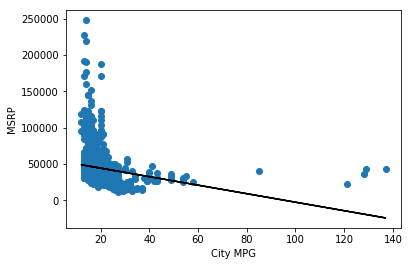

The scores for 5-fold cross validation are [ 0.09269773  0.09874971 -0.01545904  0.09708658  0.08853286]
The aveage cross validation scores is 0.07232156803104602
The intercept of the regression line is [55917.1880796]
The coefficient(s) are [[-585.63782814]]
The root mean squared error of the target is 22985.971746146548


In [4]:
X = cars_df.city_mpg.values
X = X.reshape(len(X), 1)
y = cars_df.msrp.values
y = y.reshape(len(y), 1)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.8, random_state=0)

lr = sklearn.linear_model.LinearRegression()
lr.fit(X_train, y_train)

plt.scatter(X_test, y_test)
plt.xlabel('City MPG')
plt.ylabel('MSRP')
plt.plot(X_test, lr.predict(X_test), color='black')
plt.show()
scores = sklearn.model_selection.cross_val_score(lr, X_test, y_test, cv=5)
print('The scores for 5-fold cross validation are {}'.format(scores))
print('The aveage cross validation scores is {}'.format(scores.mean()))
print('The intercept of the regression line is {}'.format(lr.intercept_))
print('The coefficient(s) are {}'.format(lr.coef_))
print('The root mean squared error of the target is {}'.format(np.sqrt(mean_squared_error(y_test, 
                                                                                          lr.predict(X_test)))))

<p>As we can see from visually analyzing the regression plots and looking at quantative values such as $R^2$, these regression models are very poor. Another metric I considered was the root mean squared error (RMSE), which essentially quantifies the difference between the predicted and actual values. The larger the RMSE, the poorer the quality of the predictor and vice versa. We will expand this further by combining both the highway and city mpg variables into one regression model called ordinary least squares. This is pretty much similar to the linear regression models already implemented but is flexible such that it can take on multiple features.<p>

In [5]:
from statsmodels.formula.api import ols

mpg_model = ols('msrp ~ city_mpg + highway_mpg', data=cars_df).fit()
print(mpg_model.summary())
print('The RMSE of the MSRP is {}'.format(np.sqrt(sum((mpg_model.resid ** 2)/len(cars_df.msrp)))))

                            OLS Regression Results                            
Dep. Variable:                   msrp   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     109.0
Date:                Sun, 30 Sep 2018   Prob (F-statistic):           3.41e-45
Time:                        00:26:17   Log-Likelihood:                -19090.
No. Observations:                1667   AIC:                         3.819e+04
Df Residuals:                    1664   BIC:                         3.820e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    7.586e+04   2672.298     28.386      

<p>As we can see, the OLS model for MSRP with respect to city and highway MPG is very poor since our R^2 scores are low and visually the regression line is not well situated with the data. Also, our RMSE is extremeley high, which pretty much means the predictor quality is low. Additionally, when viewing the summary of MSRP related to city and highway mpg, we find our p_value for our F-statistic to be extremeley low. This makes sense since our beta values are significantly large. One solution to improving these models is removing the outliers which have siginifcant leverage on the regression line's position. Let us now try that out and see what what happens. </p>

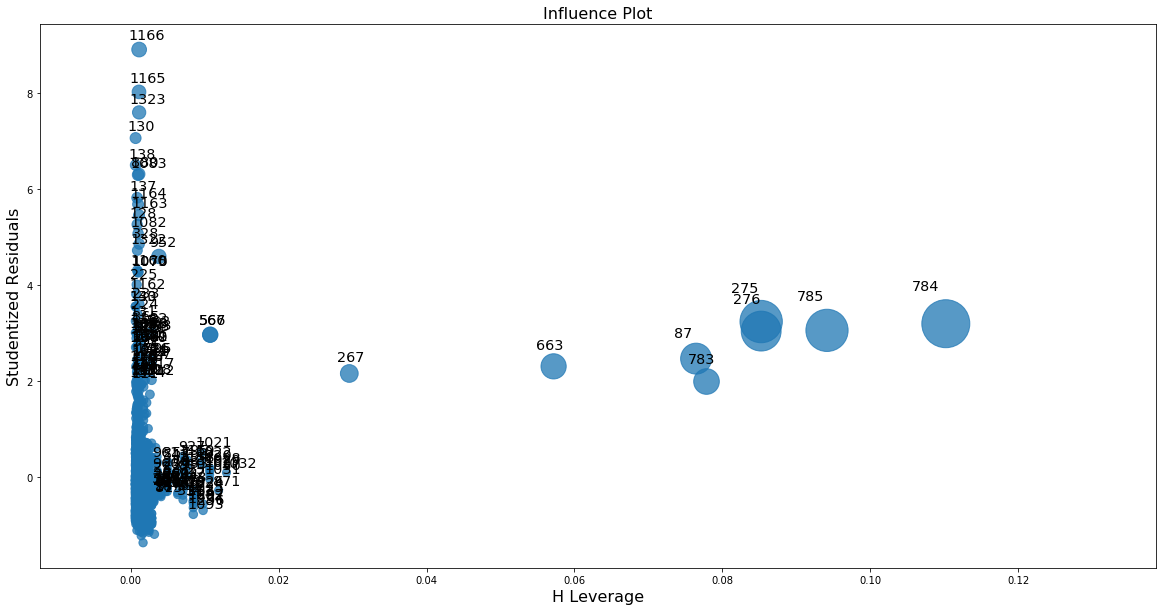

In [6]:
from statsmodels.graphics.regressionplots import influence_plot
plt.rcParams['figure.figsize'] = (20, 10)
influence_plot(mpg_model, criterion='cook')
plt.show()

<p>Based upon the influence plot above, there are outliers with significant leverage and influence which affect the positioning of the regression line. To better improve our model, we would like to remove those outliers and try implement our model once more. One method I attempted was to removed all data points whose MSRP values were one standard deviation above or below the mean.</p>

In [7]:
cars_df_within1std = cars_df[(cars_df.msrp >= (cars_df.msrp.mean() - 1*cars_df.msrp.std())) &
                             (cars_df.msrp <= (cars_df.msrp.mean() + 1*cars_df.msrp.std()))]

In [8]:
mpg_model_within1std = ols('msrp ~ city_mpg + highway_mpg', data=cars_df_within1std).fit()
print(mpg_model_within1std.summary())
print('The RMSE of the MSRP is {}'.format(np.sqrt(sum((mpg_model_within1std.resid ** 2)/len(cars_df.msrp)))))

                            OLS Regression Results                            
Dep. Variable:                   msrp   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     126.2
Date:                Sun, 30 Sep 2018   Prob (F-statistic):           3.03e-51
Time:                        00:26:19   Log-Likelihood:                -15416.
No. Observations:                1444   AIC:                         3.084e+04
Df Residuals:                    1441   BIC:                         3.085e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.618e+04   1327.562     42.316      

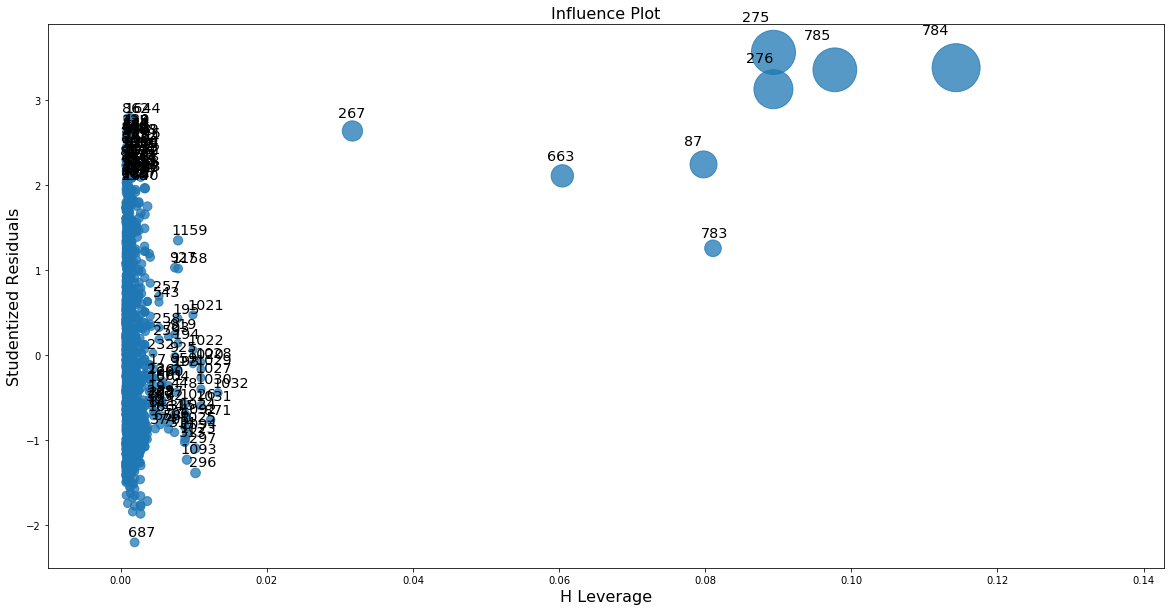

In [9]:
influence_plot(mpg_model_within1std)
plt.show()

<p>Looking at the OLS summary and the influence plots, redicing the dataset to contain values within 1 standard deviation has not contributed much to improving the performance of this model. Our goodness of fit is roughly 0.15 and its RMSE is roughly 9,750. Additionally, the outliers with significant leverage were unsuccessfully removed. To remove the high leverage outliers, I filtered out the rows with highway MPG values greater than 60.
</p>

In [10]:
cars_drop60mpg = cars_df_within1std[cars_df_within1std.highway_mpg <= 60]

In [11]:
mpg_model_60mpg = ols('msrp ~ city_mpg + highway_mpg', data=cars_drop60mpg).fit()
print(mpg_model_60mpg.summary())
print('The RMSE of the MSRP is {}'.format(np.sqrt(sum((mpg_model_60mpg.resid ** 2)/len(cars_df.msrp)))))

                            OLS Regression Results                            
Dep. Variable:                   msrp   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     221.8
Date:                Sun, 30 Sep 2018   Prob (F-statistic):           1.17e-84
Time:                        00:26:21   Log-Likelihood:                -15255.
No. Observations:                1436   AIC:                         3.052e+04
Df Residuals:                    1433   BIC:                         3.053e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     6.18e+04   1336.470     46.244      

<p>Looking at out OLS summary above, we see an improvement of the adjusted $R^2$ values by 0.087 and the RMSE going down to nearly 9,200. Although this improvement is not significant, it demonstrates how removing outliers with high leverage can improve the overall fit of the model. In the influence plot below, we see the high leverage outliers removed.</p>

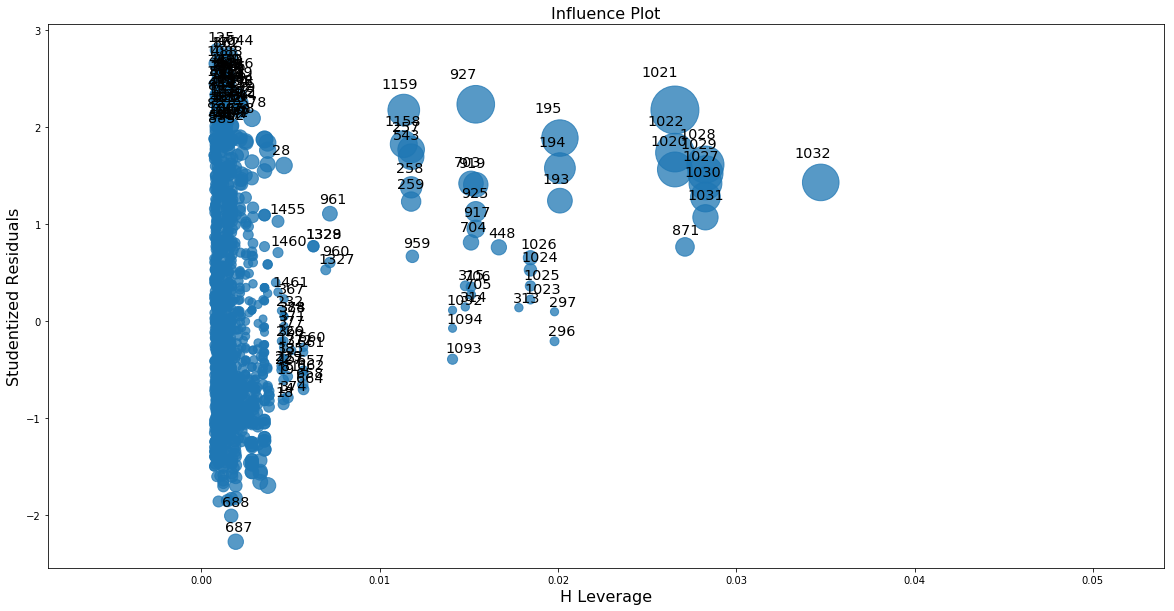

In [12]:
influence_plot(mpg_model_60mpg)
plt.show()

<p>We also show a quantile plot of the residuals of our updated data set. There is slight variation in the sample quantiles, espedially near the left and right ends of the plot. These variations imply that the distribution of tha updated data set has short tails.</p>

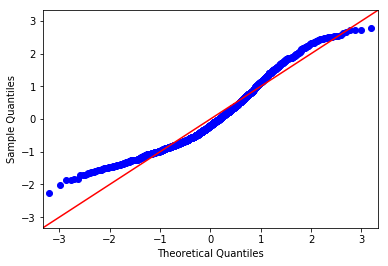

In [13]:
plt.rcParams['figure.figsize'] = (6, 4)
sm.qqplot(mpg_model_60mpg.resid, fit=True, line='45')
plt.show()

<p>Above are the results after filtering out data which had a highway mpg greater than 60. It has increased the R^2 value up by 0.087 and lowered the RMSE to about 9,200, which is slightly better but not significantly better. As we see the influence plot, we have successfully removed the outliers with very high leverage.  Unfortunately, this did not help in improving the OLS regression model. A quantile-quantile visualization is also shown above and we see that our distribution of MSRP data is not normal and follows a non-linear path.</p>

In [14]:
mpg_hp_model = ols('msrp ~ city_mpg + highway_mpg + engine_hp', data=cars_drop60mpg).fit()
print(mpg_hp_model.summary())
print('The RMSE of the MSRP is {}'.format(np.sqrt(sum((mpg_hp_model.resid ** 2)/len(cars_df.msrp)))))

                            OLS Regression Results                            
Dep. Variable:                   msrp   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     581.5
Date:                Sun, 30 Sep 2018   Prob (F-statistic):          2.26e-246
Time:                        00:26:22   Log-Likelihood:                -14725.
No. Observations:                1422   AIC:                         2.946e+04
Df Residuals:                    1418   BIC:                         2.948e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5744.5192   2058.906      2.790      

<p>In an attempt to improve our OLS model, I added the engine_hp feature. The $R^2$ value improved signifanctly and is now 0.551 and the RMSE went down to approximately 7000. The influnece plot below shows that we have outliers but their leverages are insigificant.</p>

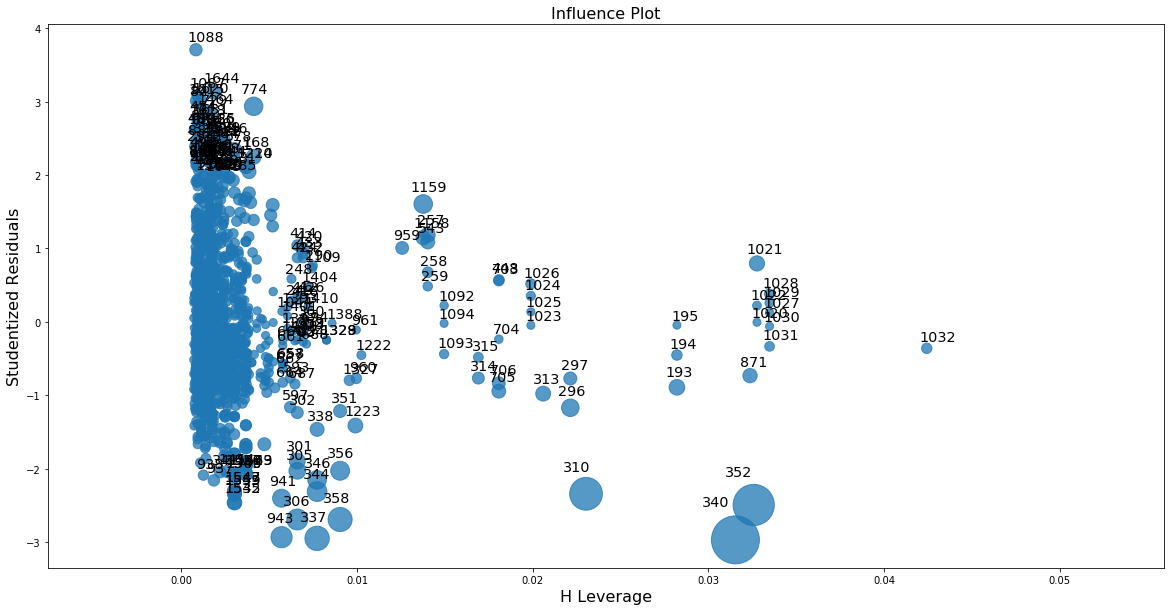

In [15]:
plt.rcParams['figure.figsize'] = (20, 10)
influence_plot(mpg_hp_model)
plt.show()

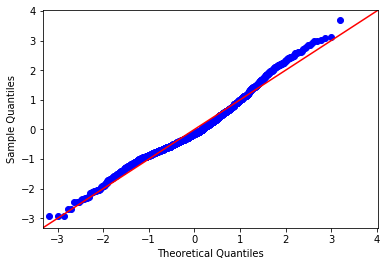

In [16]:
plt.rcParams['figure.figsize'] = (6, 4)
sm.qqplot(mpg_hp_model.resid, fit=True, line='45')
plt.show()

<p>The quantile-quantile plot above shows that the residuals in the OLS model (MSRP vs engine_hp, highway_mpg, city_mpg) are normally distributed.</p>

<p>The following plots below consists of four types of regression plots: Y and Fitted vs. X, Residuals plot, Partial Regression plot, and Compenent and Component-Plus-Residual plot.  Since we know that adding engine_hp to the OLS model improved its goodness of fit dramatically, we see that it has the best regression results compared to highway_mpg and city_mpg.</p>

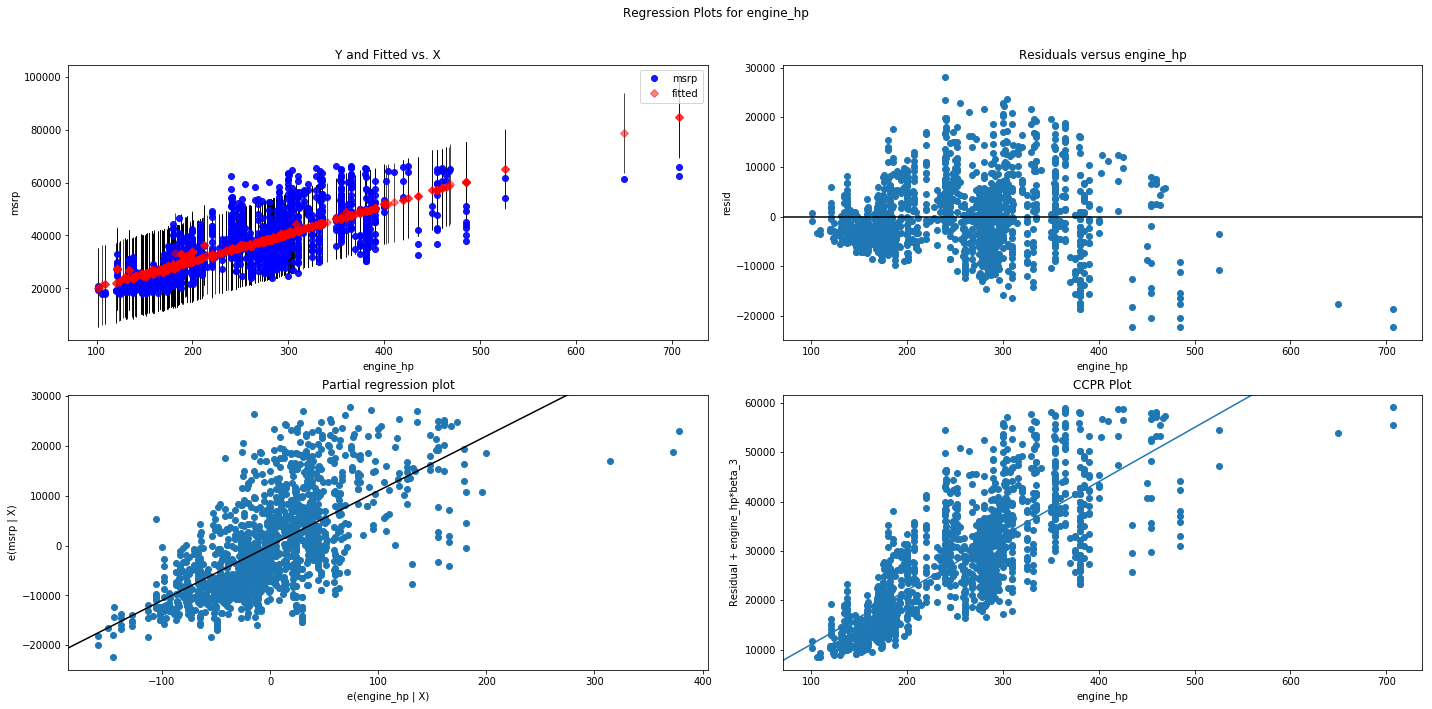

In [17]:
plt.rcParams['figure.figsize'] = (20, 10)
sm.graphics.plot_regress_exog(mpg_hp_model, 'engine_hp')
plt.show()

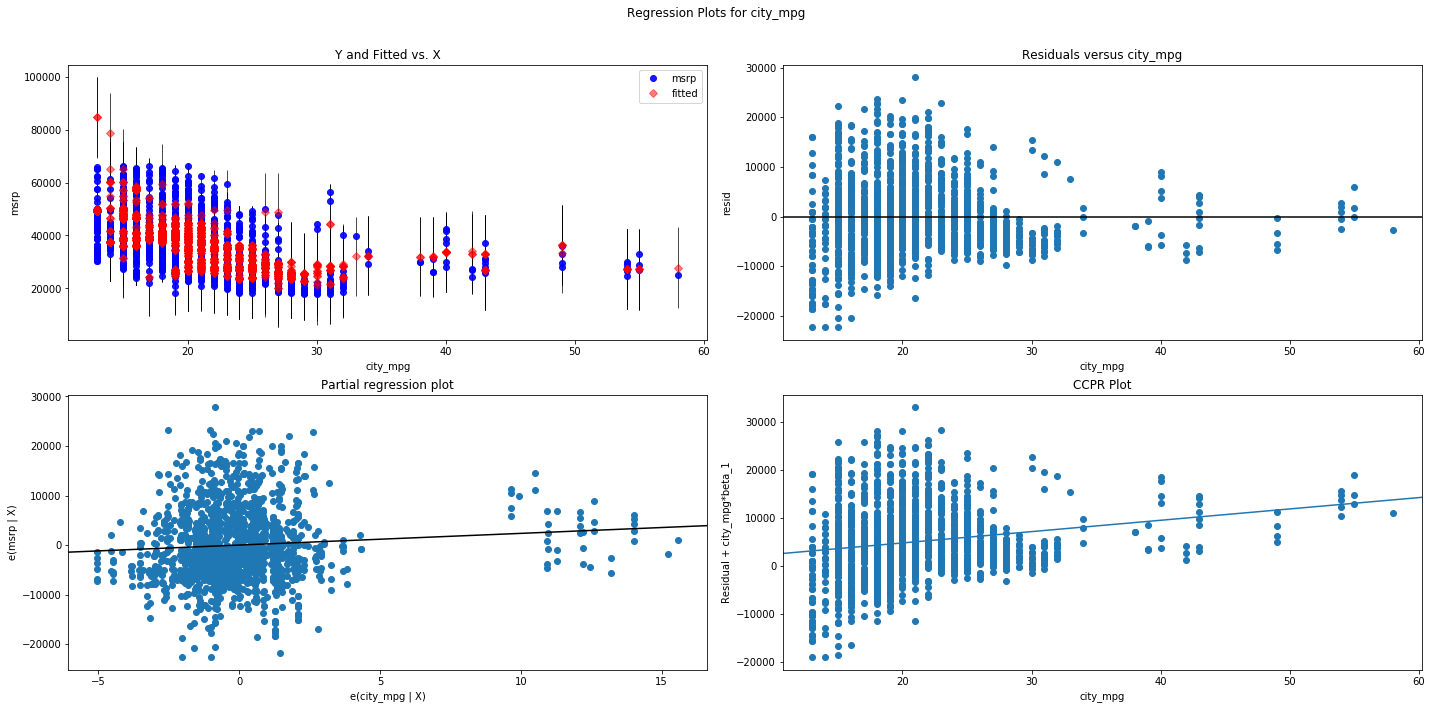

In [18]:
sm.graphics.plot_regress_exog(mpg_hp_model, 'city_mpg')
plt.show()

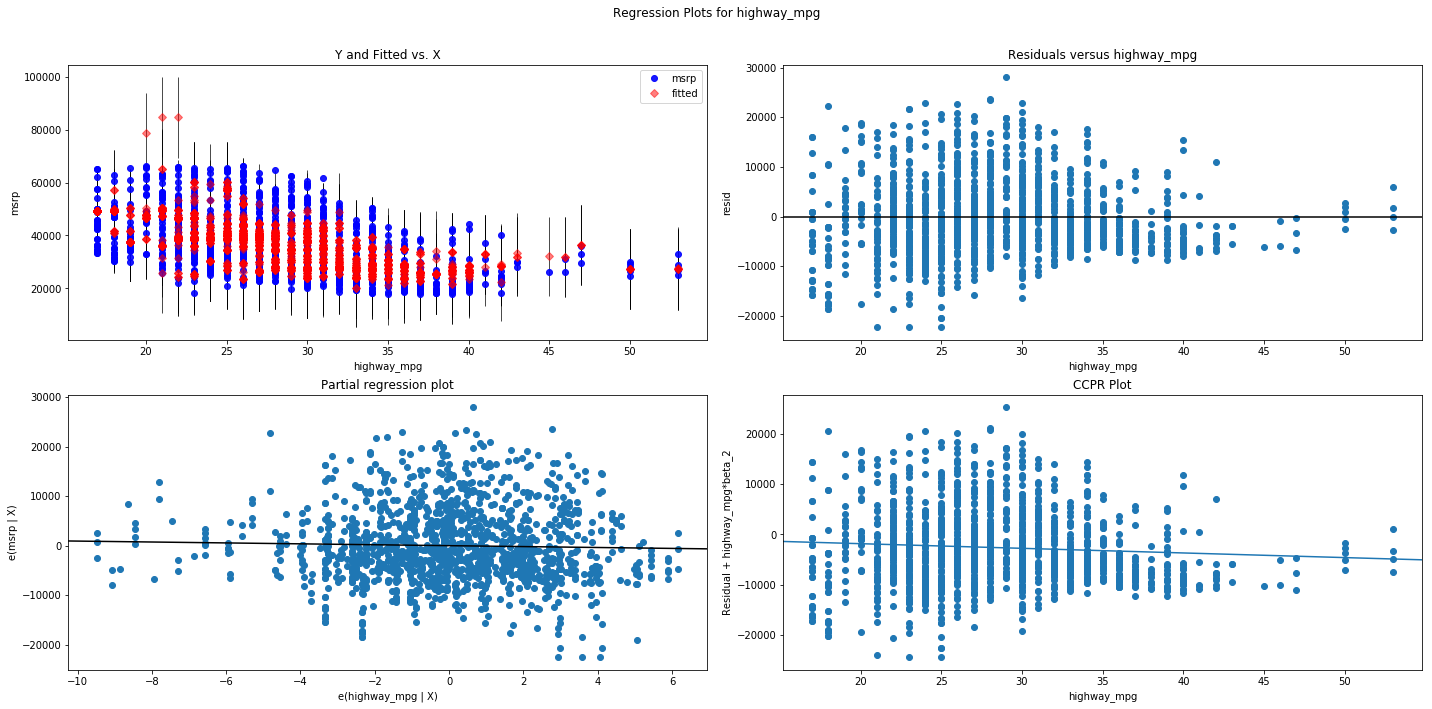

In [19]:
sm.graphics.plot_regress_exog(mpg_hp_model, 'highway_mpg')
plt.show()

## Next we will try using Ridge Regression

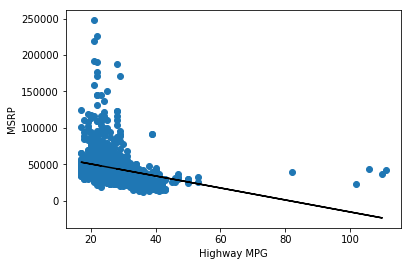

The R^2 score for the Ridge Regression Model is 0.10670212168273974
The root mean squared error of the target is 22644.30892248333


In [20]:
#ridge regression
X = cars_df.highway_mpg.values
X = X.reshape(len(X), 1)
y = cars_df.msrp.values
y = y.reshape(len(y), 1)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.8, random_state=0)
rcv = sklearn.linear_model.RidgeCV(cv=None, store_cv_values=True)
rcv.fit(X_train, y_train)

plt.rcParams['figure.figsize'] = (6, 4)
plt.scatter(X_test, y_test)
plt.xlabel('Highway MPG')
plt.ylabel('MSRP')
plt.plot(X_train, rcv.predict(X_train), color='black')
plt.show()

score = rcv.score(X_test, y_test)
print('The R^2 score for the Ridge Regression Model is {}'.format(score))
print('The root mean squared error of the target is {}'.format(np.sqrt(mean_squared_error(y_test, 
                                                                                          rcv.predict(X_test)))))

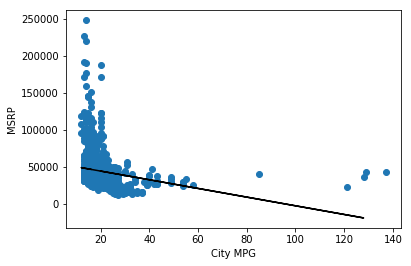

The R^2 score for the Ridge Regression Model is 0.07953372560089378
The root mean squared error of the target is 22986.077158095177


In [21]:
X = cars_df.city_mpg.values
X = X.reshape(len(X), 1)
y = cars_df.msrp.values
y = y.reshape(len(y), 1)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.8, random_state=0)

rcv = sklearn.linear_model.RidgeCV(store_cv_values=True)
rcv.fit(X_train, y_train)

plt.scatter(X_test, y_test)
plt.xlabel('City MPG')
plt.ylabel('MSRP')
plt.plot(X_train, rcv.predict(X_train), color='black')
plt.show()

score = rcv.score(X_test, y_test)
print('The R^2 score for the Ridge Regression Model is {}'.format(score))
print('The root mean squared error of the target is {}'.format(np.sqrt(mean_squared_error(y_test, 
                                                                                          rcv.predict(X_test)))))

In [22]:
ridge_model = ols('msrp ~ city_mpg + highway_mpg + engine_hp', data=cars_df).fit_regularized(method='elastic_net', 
                                                                                             alpha=10, L1_wt=0)
print(ridge_model.params)

[ -59.61897663  155.96238468 -193.35059264  163.94388313]


<p>The following list shows the intercept and coeffecients for each numerical feature of interest.</p>

# Lasso Regression

In [23]:
lasso_model = ols('msrp ~ city_mpg + highway_mpg + engine_hp', data=cars_df).fit_regularized(method='elastic_net',
                                                                                            alpha=10, L1_wt=1)
print(lasso_model.params)

Intercept     -15061.090375
city_mpg         346.048546
highway_mpg      -35.247553
engine_hp        186.501541
dtype: float64


<p>The following summary shows the intercept and coefficients for each numerical feature of interest.</p>

# Comparing Linear Regression Models

<p>A strategy to come up with the best linear regression model is to compare the $R^2$ values of Linear Regression, Random Forest Regression, KNN Regression, SVM Regression, and Logistic Regression. This will be applied to the featuers highway_mpg, city_mpg, and engine_hp. Basically, the model with the overall highest $R^2$ value will be selected and then applied to our data set to make more accurate predictions. Each of the bar charts are graphed on a log scale to remove any negative $R^2$ values since they are not relevant in finding the best model, but perhaps the worst model!</p>

In [24]:
outliers_removed_df = cars_df[cars_df.highway_mpg <= 60] #Only Removing Cars whose highway MPG is over 60
outliers_removed_df.head()

,unnamed:_0,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,0,FIAT,124 Spider,2017,premium unleaded (recommended),160.0,4.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,35,26,819,27495
1,1,FIAT,124 Spider,2017,premium unleaded (recommended),160.0,4.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,35,26,819,24995
2,2,FIAT,124 Spider,2017,premium unleaded (recommended),160.0,4.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,35,26,819,28195
3,3,BMW,2 Series,2017,premium unleaded (recommended),335.0,6.0,AUTOMATIC,all wheel drive,2.0,Compact,Coupe,31,21,3916,46450
4,4,BMW,2 Series,2017,premium unleaded (recommended),335.0,6.0,AUTOMATIC,rear wheel drive,2.0,Compact,Convertible,32,21,3916,49050


# Comparing Models for MSRP Prediction

### MSRP vs. Highway MPG

                       R2_value
Model                          
LinearRegression       0.120970
RandomForestRegressor  0.092586
KNeighborsRegressor    0.064573
SVR                    0.074569


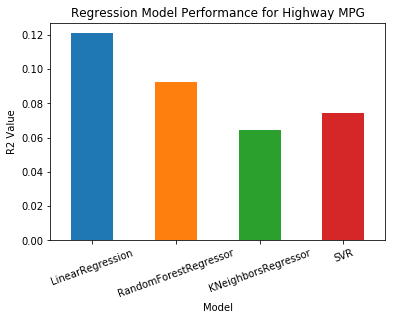

In [25]:
#Compariing Models for Highway MPG
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

X = outliers_removed_df.highway_mpg.values
X = X.reshape(len(X), 1)
y = outliers_removed_df.msrp.values
y = y.reshape(len(y), 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

TestModels = pd.DataFrame()
temp = {}

models = [
         LinearRegression(), 
         RandomForestRegressor(n_estimators=100, max_features='sqrt'),
         KNeighborsRegressor(n_neighbors=6),
         SVR(kernel='linear')
        ]

for model in models:
    #Get Model Name
    m = str(model)
    temp['Model'] = m[:m.index('(')]
    
    model.fit(X_train, y_train.ravel())
    
    temp['R2_value'] = r2_score(y_test, model.predict(X_test))
    
    TestModels = TestModels.append([temp], ignore_index=True)

TestModels.set_index('Model', inplace=True)

TestModels.R2_value.plot(kind='bar')
plt.title('Regression Model Performance for Highway MPG')
plt.xticks(rotation=20)
plt.ylabel('R2 Value')
print(TestModels)
plt.show()

### MSRP vs. City MPG

                       R2_value
Model                          
LinearRegression       0.136589
RandomForestRegressor  0.136077
KNeighborsRegressor    0.156098
SVR                    0.047062


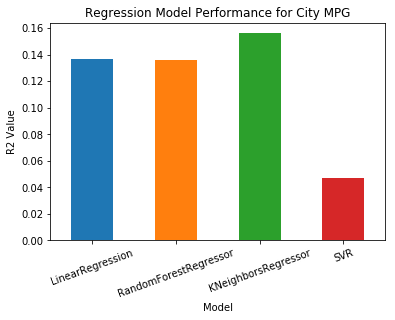

In [26]:
#Comparing Model for City MPG
X = outliers_removed_df.city_mpg.values
X = X.reshape(len(X), 1)
y = outliers_removed_df.msrp.values
y = y.reshape(len(y), 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

TestModels = pd.DataFrame()
temp = {}

models = [
         LinearRegression(), 
         RandomForestRegressor(n_estimators=100, max_features='sqrt'),
         KNeighborsRegressor(n_neighbors=6),
         SVR(kernel='linear')
        ]

for model in models:
    #Get Model Name
    m = str(model)
    temp['Model'] = m[:m.index('(')]
    
    model.fit(X_train, y_train.ravel())
    
    temp['R2_value'] = r2_score(y_test, model.predict(X_test))
    
    TestModels = TestModels.append([temp], ignore_index=True)

TestModels.set_index('Model', inplace=True)

TestModels.R2_value.plot(kind='bar')
plt.title('Regression Model Performance for City MPG')
plt.xticks(rotation=20)
plt.ylabel('R2 Value')
print(TestModels)
plt.show()

### MSRP vs. Engine HP

                       R2_value
Model                          
LinearRegression       0.518830
RandomForestRegressor  0.739933
KNeighborsRegressor    0.588946
SVR                    0.613759


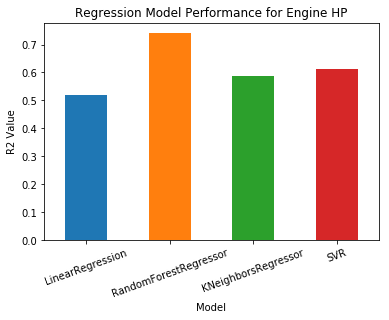

In [27]:
#Model for Engine HP
X = outliers_removed_df.engine_hp.values
y = outliers_removed_df.msrp.values

#Remove Nan Values and restructure X and y columns
data_zipped = list(zip(X.tolist(), y.tolist()))
data_zipped_filtered = [(x, y) for x,y in data_zipped if not x!=x]

X, y = zip(*data_zipped_filtered)
X = np.array(X).reshape(len(X), 1)
y = np.array(y).reshape(len(y), 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

TestModels = pd.DataFrame()
temp = {}

models = [
         LinearRegression(), 
         RandomForestRegressor(n_estimators=100, max_features='sqrt'),
         KNeighborsRegressor(n_neighbors=6),
         SVR(kernel='linear')
        ]

for model in models:
    #Get Model Name
    m = str(model)
    temp['Model'] = m[:m.index('(')]
    
    model.fit(X_train, y_train.ravel())
    
    temp['R2_value'] = r2_score(y_test, model.predict(X_test))
    
    TestModels = TestModels.append([temp], ignore_index=True)

TestModels.set_index('Model', inplace=True)

TestModels.R2_value.plot(kind='bar')
plt.title('Regression Model Performance for Engine HP')
plt.xticks(rotation=20)
plt.ylabel('R2 Value')
print(TestModels)
plt.show()

<p>Overall, the best $R^2$ result is from Random Forest.  Random Forest is the winner!</p>

# Random Forest

<p>Here we apply Random Forest to predict the MSRP given make, engine_hp, number of cylinders, transmission type, number of doors, highway_mpg, and city_mpg. We see that the $R^2$ value is nearly at 0.87, which means that this is quite a good model to predict MRSP. It is definitely much better than our best OLS model by almost 1.5 times.</p>

In [28]:
labels = np.array(outliers_removed_df.msrp)
features = outliers_removed_df.drop(['unnamed:_0', 'model', 
                                     'year', 'engine_fuel_type', 
                                     'driven_wheels',
                                     'vehicle_size', 'vehicle_style', 
                                     'popularity', 'msrp'], axis=1)
replace_brands = {'make': {'Acura': 1, 'Audi': 2, 'BMW': 3, 'Buick': 4, 'Cadillac': 5, 'Chevrolet': 6,
                           'Chrysler': 7, 'Dodge': 8, 'FIAT': 9, 'Ford': 10, 'GMC': 11, 'Genesis': 12, 'Honda': 13,
                           'Hyundai': 14, 'Infiniti': 15, 'Kia': 16, 'Land Rover': 17, 'Lexus': 18, 'Lincoln': 19,
                           'Lotus': 20, 'Maserati': 21, 'Mazda': 22, 'Mercedes-Benz': 23, 'Mitsubishi': 24, 
                           'Nissan': 25, 'Porsche': 26, 'Subaru': 27, 'Toyota': 28, 'Volkswagen': 29, 'Volvo': 30}}
replace_transmissions = {'transmission_type': {'AUTOMATED_MANUAL': 1, 'AUTOMATIC': 2, 
                                              'DIRECT_DRIVE': 3, 'MANUAL': 4}}
feature_list = features.columns
features.replace(replace_brands, inplace=True)
features.replace(replace_transmissions, inplace=True)
features = np.array(features)
#print(features)
data_zipped = list(zip(features, labels))
data_zipped_filtered = [([t, u, v, w, x, y, z], a) for [t, u, v, w, x, y, z], a in data_zipped if not u!=u]
#print(data_zipped_filtered)
features, labels = zip(*data_zipped_filtered)

features = np.array(features).reshape(len(features), 7)
labels = np.array(labels).reshape(len(labels), 1)

X_train, X_test, y_train, y_test = train_test_split(features, labels, 
                                                    test_size=0.7, random_state=0)

rf = RandomForestRegressor(n_estimators=1000, oob_score=True, max_features='auto', 
                           random_state=0)
rf.fit(X_train, y_train.ravel())

accuracy =rf.score(X_test, y_test)
print('The R^2 value for the Random Forest model is {}'.format(accuracy))
print('The RMSE value for the Random Forest model is {}'.format(np.sqrt(mean_squared_error(y_test,
                                                                                          rf.predict(X_test)))))

The R^2 value for the Random Forest model is 0.8743643286554397
The RMSE value for the Random Forest model is 7599.960684616525


In [29]:
df_Test = pd.DataFrame({'engine_hp': X_test[:, 0],
                        'highway_mpg': X_test[:, 1],
                        'city_mpg': X_test[:, 2],
                        'msrp': y_test[:, 0]})
df_Test['rf_resid'] = np.absolute(df_Test.msrp - rf.predict(X_test)).round(-3)
print('The mean absolute error for Random Forest model is {}'
      .format(round(sum(df_Test.rf_resid)/len(df_Test.rf_resid), -3))) ## 
print('The min and max price range is {}'
      .format((df_Test.msrp.min(), df_Test.msrp.max()))) ## Minimum and Maximum of Test Set (Price)

The mean absolute error for Random Forest model is 5000.0
The min and max price range is (11990, 219850)


In [30]:
from sklearn.tree import export_graphviz
import pydot

tree = rf.estimators_[0]
export_graphviz(tree, out_file='tree.dot', feature_names=feature_list, 
                rounded=True, precision=1)
(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

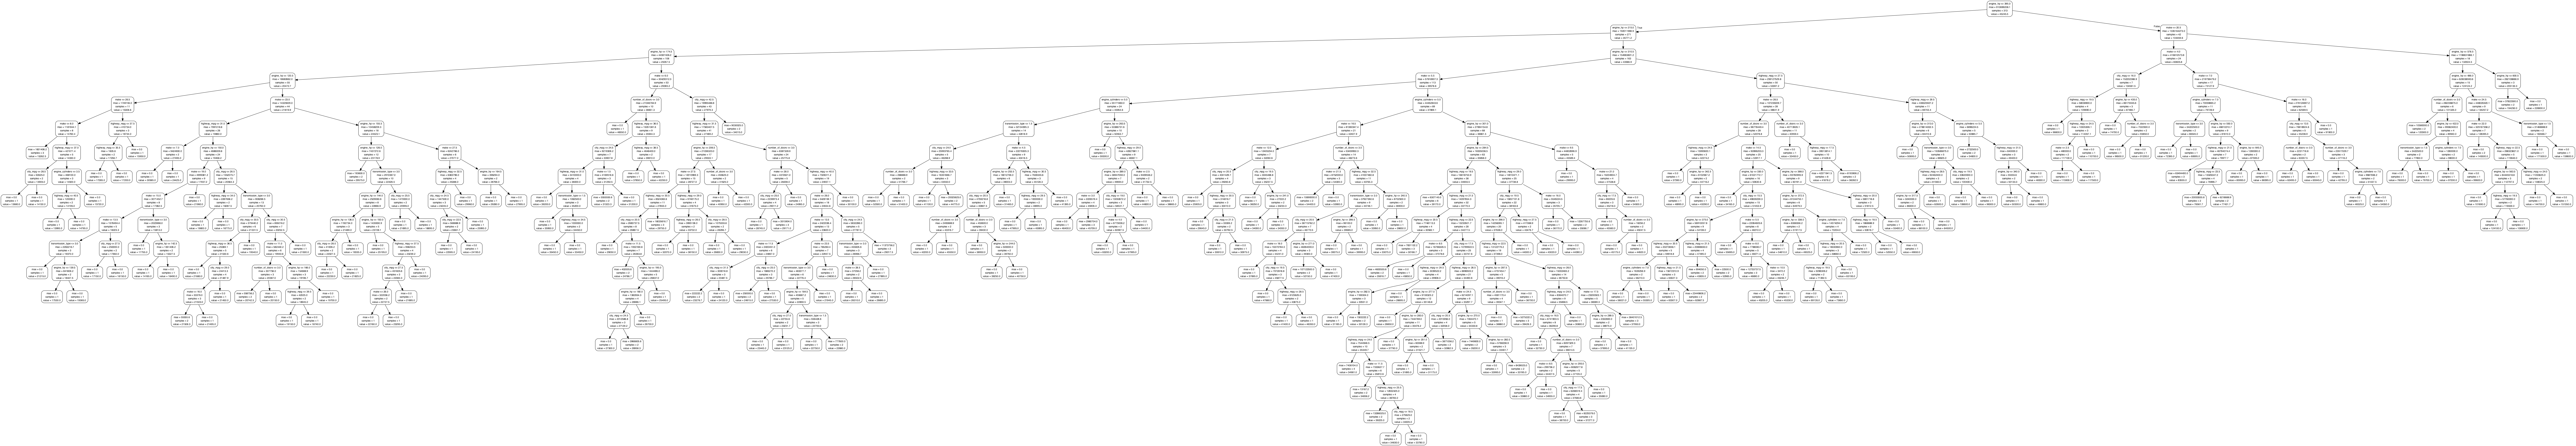

In [31]:
from IPython.display import Image
Image(filename='tree.png') 

<p>Above we have one decision tree from one of the estimator attributes from the random forest. This graphic rougly shows us the process of how the Random Forest model makes predictions on the MSRP.</p>

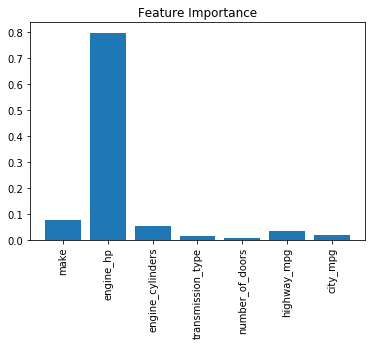

In [32]:
plt.bar(feature_list, rf.feature_importances_)
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()

<p>This bar graph tells us which features are the most important in making a prection on MSRP. As what we can see here, engine_hp plays the most significant role by far in MSRP prediction.</p>

<p>To better understand the decision tree from the Random Forest model, I modified the model to have a maximum depth of 3 so that the decision tree graphic can be more reader friendly. I also used fewer estimators.</p>

In [33]:
rf_small = RandomForestRegressor(n_estimators=10, random_state=0, max_depth = 3)
rf_small.fit(X_train, y_train.ravel())

accuracy =rf_small.score(X_test, y_test)
print('The R^2 value for the Random Forest model is {}'.format(accuracy))
print('The RMSE value for the Random Forest model is {}'.format(np.sqrt(mean_squared_error(y_test,
                                                                                          rf.predict(X_test)))))

The R^2 value for the Random Forest model is 0.7599231015421192
The RMSE value for the Random Forest model is 7599.960684616525


<p>With the number of estimators and the maximum depth of the decision trees modified, we have an $R^2$ value of 0.76, which is still a good model for MSRP prediction.</p>

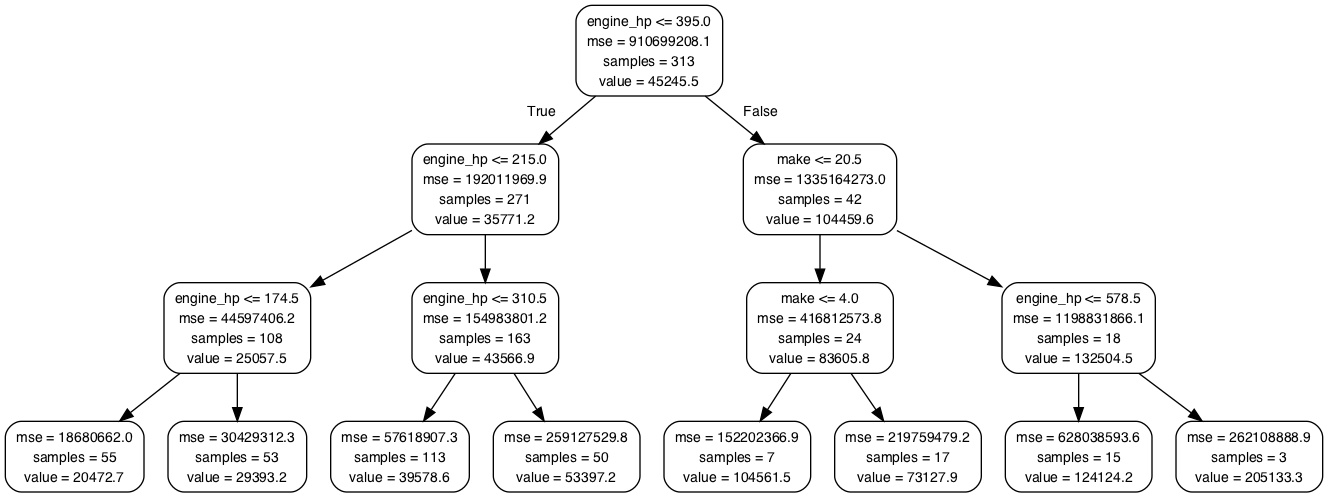

In [34]:
tree_small = rf_small.estimators_[0]
export_graphviz(tree_small, out_file='tree_small.dot', feature_names=feature_list, 
                rounded=True, precision=1)
(graph,) = pydot.graph_from_dot_file('tree_small.dot')
graph.write_png('tree_small.png')
Image(filename='tree_small.png')

<p>Looking at the decision tree from the first estimator, we see that in each node, the condition of a feature determines values for the mean squared error, number of samples, and the value of interest (in our case, the MSRP). A price prediction will be determined once a leaf in the decision tree is reached.</p>

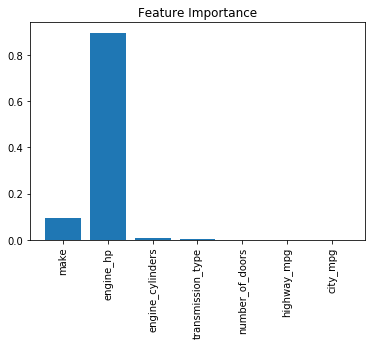

In [35]:
plt.bar(feature_list, rf_small.feature_importances_)
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()

<p>Again, the engine_hp dominates in feature importance.</p>

## <center> Categorical Data Mapping Schemes </center>
|Index|make         |Index|make         |Index|make         |
|-----|-------------|-----|-------------|-----|-------------|
|  1  |Acura        | 11  |GMC          | 21  |Maserati     |
|  2  |Audi         | 12  |Genesis      | 22  |Mazda        |
|  3  |BMW          | 13  |Honda        | 23  |Mercedes-Benz|
|  4  |Buick        | 14  |Hyundai      | 24  |Mitsubishi   |
|  5  |Cadillac     | 15  |Infiniti     | 25  |Nissan       |
|  6  |Chevrolet    | 16  |Kia          | 26  |Porsche      |
|  7  |Chrysler     | 17  |Land Rover   | 27  |Subaru       |
|  8  |Dodge        | 18  |Lexus        | 28  |Toyota       |
|  9  |FIAT         | 19  |Lincoln      | 29  |Volkswagen   |
| 10  |Ford         | 20  |Lotus        | 30  |Volvo        | 


|Index|transmission_type|
|-----|-----------------|
|  1  |AUTOMATED_MANUAL |
|  2  |AUTOMATIC        |
|  3  |DIRECT_DRIVE     |
|  4  |MANUAL           |

# Prediction Function Call and Parameter List
<pre>rf.predict([[make, 
            engine_hp,
            engine_cylinders,
            transmission_type,
            number_of_doors,
            highway_mpg,
            city_mpg]]).round(-3)
</pre>
note: round(-3) rounds price to the nearest 1,000th

In [36]:
##Price Point Prediction for Kia
rf.predict([[16, 
             150, 
             4, 
             2, 
             4, 
             40, 
             35]]).round(-3)

array([20000.])

In [37]:
##Price Point Prediction for Toyota
rf.predict([[28,
            150,
            4,
            2,
            4,
            40,
            35]]).round(-3)

array([23000.])

<p>
    The predictions above show the prices of Kia vs. Toyota with identical features.
    The car by Kia in this scenario has the more competitive price than Toyota.
</p>

In [38]:
kia_price = []
toyota_price = []

for i in range(150, 450):
    kia_price.append(rf.predict([[16,
                                 i,
                                 4,
                                 2,
                                 4,
                                 40,
                                 35]]).round(-3)[0])
    toyota_price.append(rf.predict([[28,
                                    i,
                                    4,
                                    2,
                                    4,
                                    40,
                                    35]]).round(-3)[0])

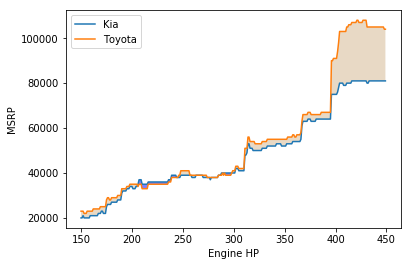

In [39]:
np_kia_price = np.array(kia_price)
np_toyota_price = np.array(toyota_price)

plt.plot(range(150, 450), np_kia_price, range(150, 450), np_toyota_price)
plt.fill_between(range(150, 450), np_kia_price, np_toyota_price,
                 where=np_kia_price >= np_toyota_price, alpha=0.5, facecolor='blue')
plt.fill_between(range(150, 450), np_kia_price, np_toyota_price, 
                 where=np_kia_price <= np_toyota_price, alpha=0.5, facecolor='tan')
plt.legend(labels=['Kia', 'Toyota'])
plt.xlabel('Engine HP')
plt.ylabel('MSRP')
plt.show()

<p>
    The plot above shows the MSRP predictions of Kia and Toyota with respect to Engine HP.
    All other features are fixed.
    <pre>    engine_cylinders  = 4
    transmission_type = AUTOMATIC
    number_of_doors   = 4
    highway_mpg       = 40
    city_mpg          = 35
    </pre>
</p>

In [40]:
##Price Point Prediction for Mercedes-Benz
rf.predict([[23,
            255,
            8,
            2,
            4,
            29,
            22]]).round(-3)

array([41000.])

In [41]:
##Price Point Prediction for BMW
rf.predict([[2,
            255,
            8,
            2,
            4,
            29,
            22]]).round(-3)

array([53000.])

<p>
    The predictions above show the prices of Mercedes-Benz vs. BMW with identical features.
    The car by Mercedes-Benz in this scenario has the more competitive price than BMW.
</p>

In [42]:
mercedes_price = []
bmw_price = []

for i in range(150, 450):
    mercedes_price.append(rf.predict([[23,
                                     i,
                                     8,
                                     2,
                                     4,
                                     29,
                                     22]]).round(-3)[0])
    bmw_price.append(rf.predict([[2,
                                i,
                                8,
                                2,
                                4,
                                29,
                                22]]).round(-3)[0])


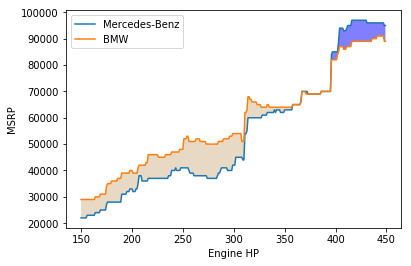

In [43]:
np_mercedes_price = np.array(mercedes_price)
np_bmw_price = np.array(bmw_price)

plt.plot(range(150, 450), np_mercedes_price, range(150, 450), np_bmw_price)
plt.fill_between(range(150, 450), np_mercedes_price, np_bmw_price,
                 where=np_bmw_price >= np_mercedes_price, alpha=0.5, facecolor='tan')
plt.fill_between(range(150, 450), np_mercedes_price, np_bmw_price, 
                 where=np_bmw_price <= np_mercedes_price, alpha=0.5, facecolor='blue')
plt.legend(labels=['Mercedes-Benz', 'BMW'])
plt.xlabel('Engine HP')
plt.ylabel('MSRP')
plt.show()

<p>
    The plot above shows the MSRP predictions of Mercedes and BMW with respect to Engine HP.
    All other features are fixed.
    <pre>    engine_cylinders  = 8
    transmission_type = AUTOMATIC
    number_of_doors   = 4
    highway_mpg       = 29
    city_mpg          = 22
    </pre>
</p>